In [1]:
import mlflow

In [2]:
mlflow.set_tracking_uri('http://mlflow:5000')

In [8]:
experiment_id = mlflow.create_experiment('experiment2') #name must be unique, maybe do timestamp?

In [5]:
from mlflow.tracking import MlflowClient
client = MlflowClient()
experiments = client.list_experiments() # returns a list of mlflow.entities.Experiment
experiments 

[<Experiment: artifact_location='/mlflow/0', experiment_id='0', lifecycle_stage='active', name='Default', tags={}>,
 <Experiment: artifact_location='/mlflow/1', experiment_id='1', lifecycle_stage='active', name='experiment-alpha', tags={}>,
 <Experiment: artifact_location='/mlflow/3', experiment_id='3', lifecycle_stage='active', name='experiment-alpha2', tags={}>,
 <Experiment: artifact_location='/mlflow/5', experiment_id='5', lifecycle_stage='active', name='experiment1', tags={}>]

In [6]:
run = client.create_run(experiments[0].experiment_id) # returns mlflow.entities.Run
client.log_param(run.info.run_uuid, "hello", "world")
client.set_terminated(run.info.run_uuid)

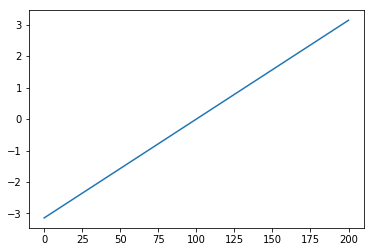

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 201)
sin = np.sin(x)
cos = np.cos(x)
plt.plot(x)

plt.savefig('test.png')

mlflow.end_run()
with mlflow.start_run(experiment_id=experiment_id):
    mlflow.log_param("name", 'sine test')
    mlflow.log_param("mood", 'great')
    mlflow.log_param("weather", 'sunny')
    
    for value in sin:
        mlflow.log_metric("sine", value)
    for value in cos:
        mlflow.log_metric("cosine", value)
    mlflow.log_artifact('test.png')